In [21]:
import torch
import torchvision #Collection of datasets of vision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

%matplotlib inline

In [2]:
train = datasets.MNIST("",train=True, 
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False, 
                      download=True,
                      transform=transforms.Compose([transforms.ToTensor()])) #Validation dataset

trainset = torch.utils.data.DataLoader(train, 
                                       batch_size = 10, shuffle = True)

testset = torch.utils.data.DataLoader(test, 
                                      batch_size = 10, shuffle = True) #Shuffling because generalizing

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #Running the initialization method from parent class
        
        #Create 3 layers of fully connected layers

        self.fc1 = nn.Linear(28*28, 64) #Inputs the flattened image
        self.fc2 = nn.Linear(64, 64) #Takes in the output from the last layer and outputs 64 nodes
        self.fc3 = nn.Linear(64, 64) #Same as above
        self.fc4 = nn.Linear(64, 10) #final layer giving 10 outputs(10 digits)
    
    def forward(self, x):
        x = F.relu(self.fc1(x)) #Output through ReLU activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1) #Softmax Loss along dimension 1(y-axis)


        
net = Net()
print(net)
    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [20]:
output = net(X)

In [18]:
output

tensor([[-2.3796, -2.2705, -2.1271, -2.3619, -2.2544, -2.3381, -2.3095, -2.3878,
         -2.3616, -2.2646]], grad_fn=<LogSoftmaxBackward>)

In [26]:
optimizer = optim.Adam(net.parameters(), lr=1e-3) #0.001

EPOCHS = 5

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()  #to stop gradients being added up
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y) 
        loss.backward()
        optimizer.step()
    print(loss)

    


tensor(0.0312, grad_fn=<NllLossBackward>)
tensor(0.0482, grad_fn=<NllLossBackward>)
tensor(0.0248, grad_fn=<NllLossBackward>)
tensor(0.0230, grad_fn=<NllLossBackward>)
tensor(0.0129, grad_fn=<NllLossBackward>)


In [28]:
correct = 0
total = 0

with torch.no_grad():  #Not calculating gradients for validation set
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

    

Accuracy:  0.983


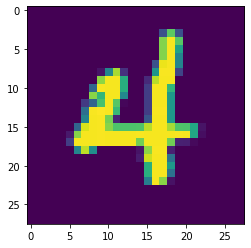

In [35]:
plt.imshow(X[3].view(28,28))

In [36]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(4)
